In [39]:
#Thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
warnings.filterwarnings('ignore')

# **Tải dữ liệu**

In [40]:
#Đọc dữ liệu bằng pandas
df = pd.read_csv('/content/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,YESorNO
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [41]:
#Số cột, hàng của dữ liệu
print('Số hàng: ', df.shape[0])
print('Số đặc trưng (bao gồm cả biến mục tiêu): ', df.shape[1])

Số hàng:  4240
Số đặc trưng (bao gồm cả biến mục tiêu):  16


In [42]:
#Thông tin của dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  YESorNO          4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# **Làm sạch và khám phá dữ liệu**

In [43]:
#Số dữ liệu bị thiếu
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


<Axes: >

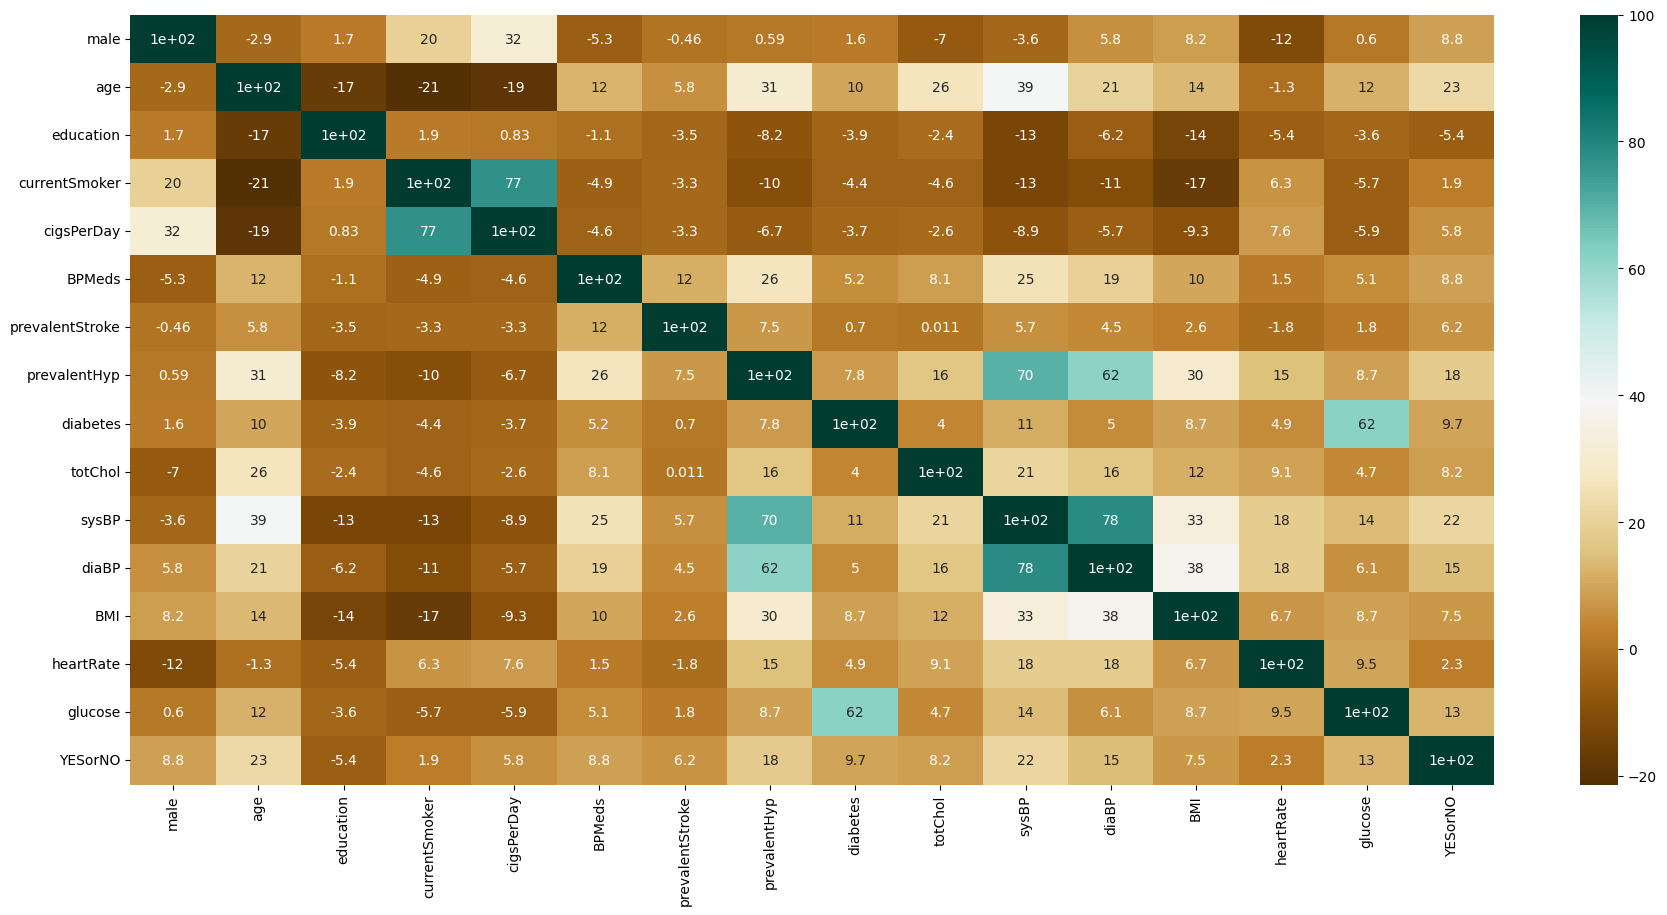

In [44]:
#Tương quan dữ liệu bằng biểu đồ nhiệt
plt.figure(figsize=(22,10))
sns.heatmap(df.corr()*100, annot=True, cmap='BrBG')

In [45]:
#Thay thế dữ liệu thiếu bằng giá trị median
def median(data):
  return data.fillna(data.median())

In [46]:
#Dùng hàm để fill dữ liệu
df.glucose = df['glucose'].transform(median)
df.education = df['education'].transform(median)
df.heartRate = df['heartRate'].transform(median)
df.totChol = df['totChol'].transform(median)
df.BPMeds = df['BPMeds'].transform(median)

#Fill theo nhóm dữ liệu có liên hệ với nhau
smoker = df.groupby(['currentSmoker'])
df.cigsPerDay = smoker['cigsPerDay'].transform(median)
male_age = df.groupby(['male','age'])
df.BMI = male_age['BMI'].transform(median)

In [47]:
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


Text(0.5, 1.0, 'Bệnh nhân theo giới tính')

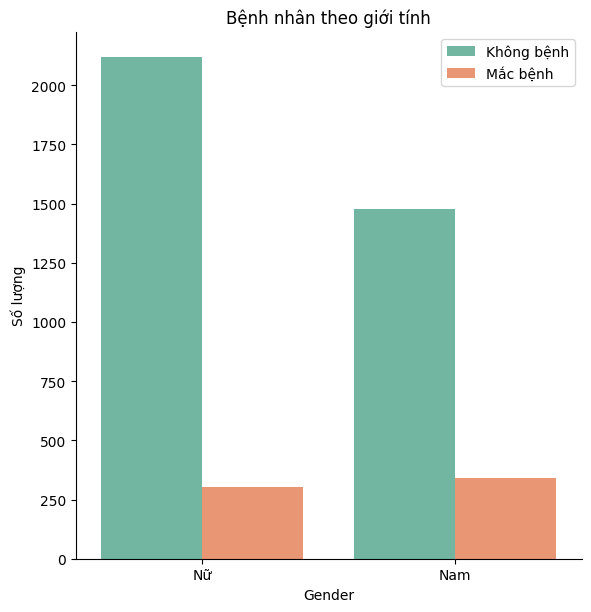

In [48]:
#Bệnh nhân theo giới tính
sns.catplot(x='male', hue='YESorNO', data=df, kind='count', palette='Set2', height=6, legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Nữ', 'Nam'])
plt.ylabel('Số lượng')
plt.legend(['Không bệnh', 'Mắc bệnh'])
plt.title('Bệnh nhân theo giới tính')

Text(0.5, 1.0, 'Phân bố của đặc trưng HeartRate')

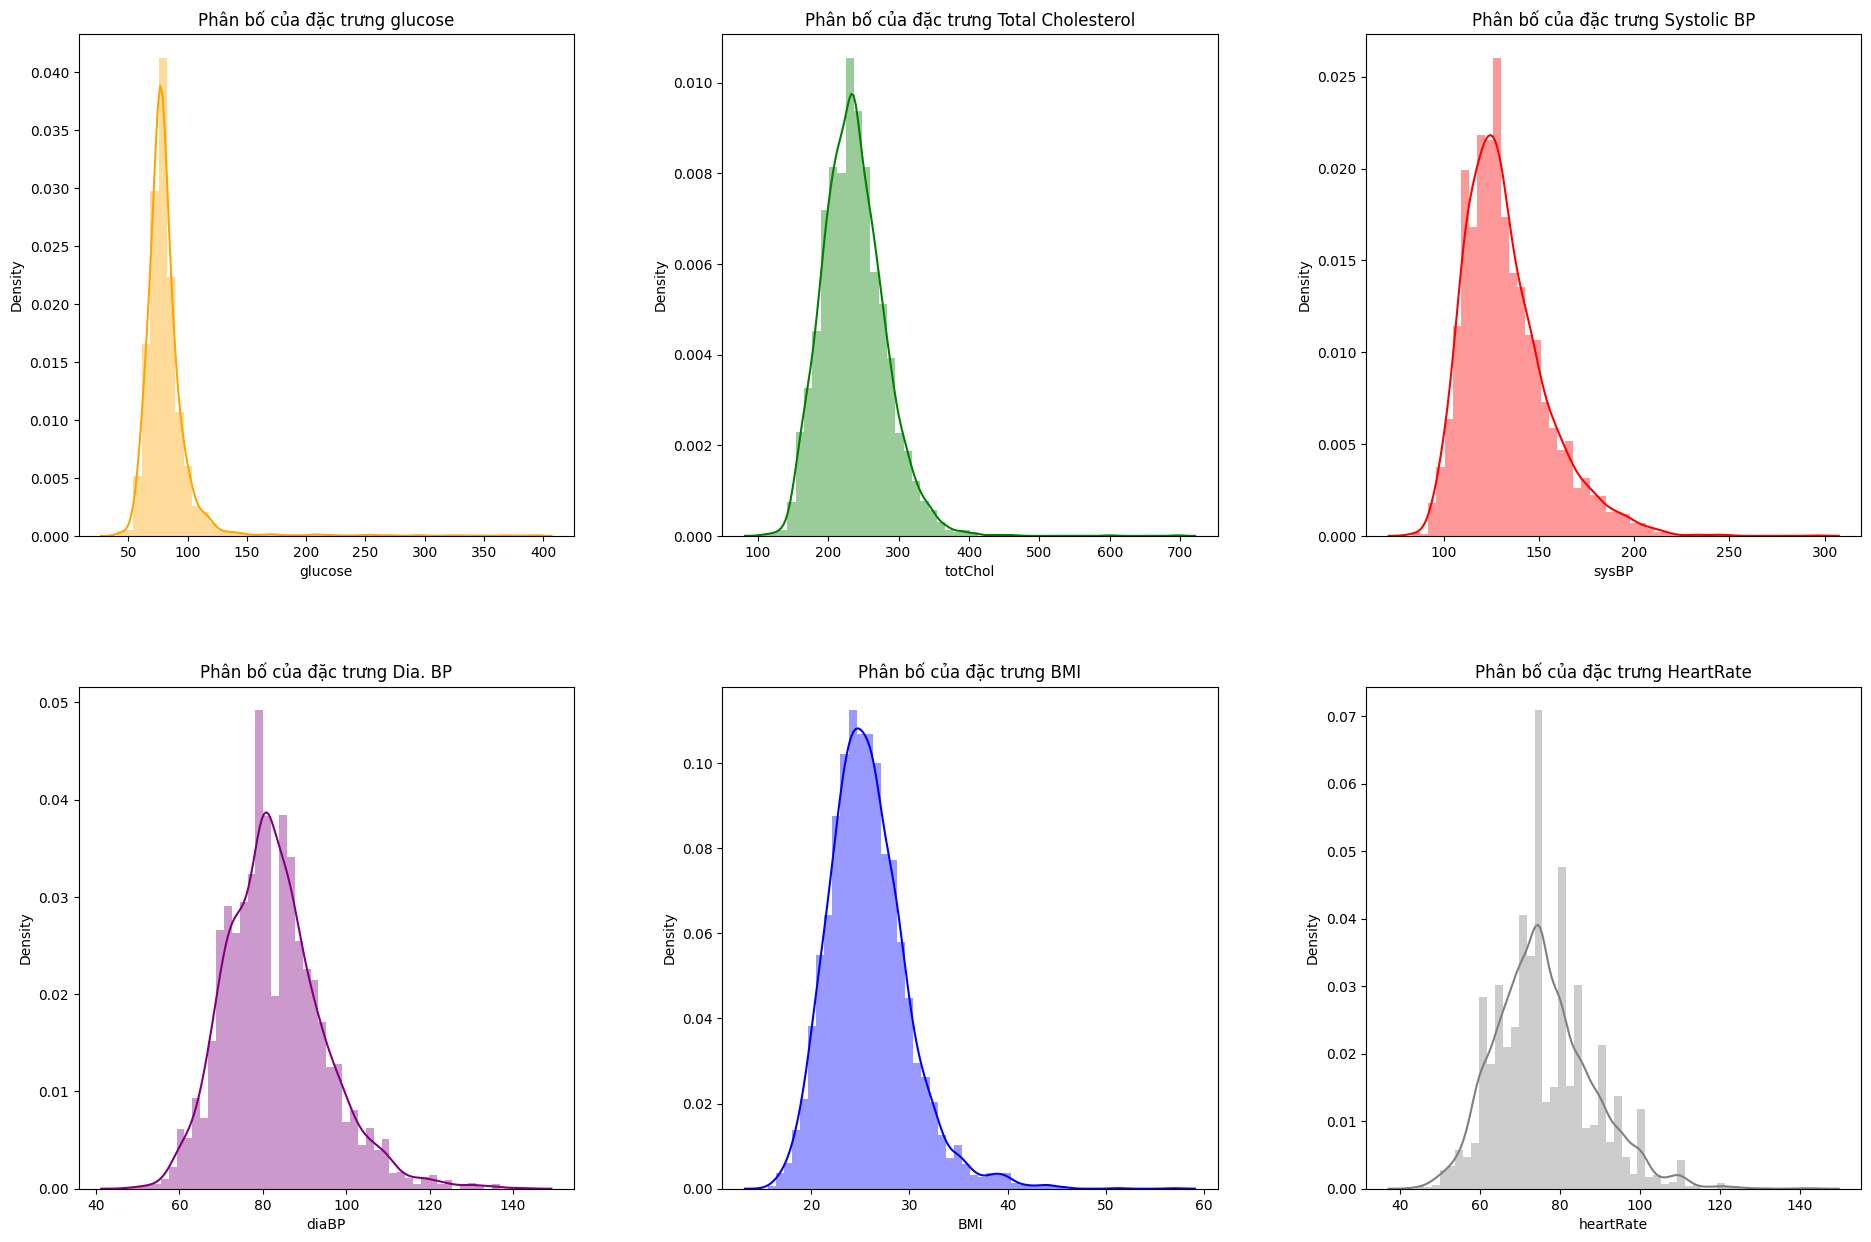

In [49]:
#Trực quan sự phân bổ của dữ liệu

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(df['glucose'] , color='orange')
plt.title('Phân bố của đặc trưng glucose')

plt.subplot(2, 3, 2)
sns.distplot(df['totChol'], color='g')
plt.title('Phân bố của đặc trưng Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(df['sysBP'], color='r')
plt.title('Phân bố của đặc trưng Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(df['diaBP'] , color='purple')
plt.title('Phân bố của đặc trưng Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(df['BMI'], color='blue')
plt.title('Phân bố của đặc trưng BMI')

plt.subplot(2, 3, 6)
sns.distplot(df['heartRate'], color='grey')
plt.title('Phân bố của đặc trưng HeartRate')

Text(0.5, 1.0, 'Phân bố theo tuổi')

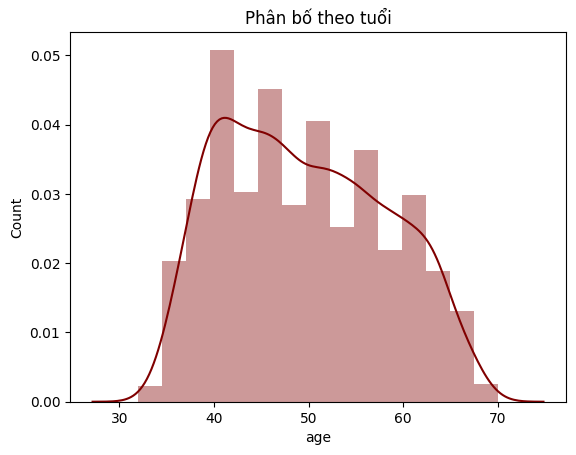

In [50]:
sns.distplot(df['age'], bins=15, kde=True, color='maroon')
plt.ylabel('Count')
plt.title('Phân bố theo tuổi')

In [51]:
#Chuyển về dữ liệu phân loại
def encode_age(data):
    if data <= 40:
        return 0 #Người lớn
    if data > 40 and data <=55:
        return 1 #Trung niên
    else:
        return 2 #Cao tuổi

def heartrate_enc(data):
    if data <= 60:
        return 0 #Thấp
    if data > 60 and data <=100:
        return 1 #Trung bình
    else:
        return 2 #Cao

df['encode_hr'] = df['heartRate'].apply(heartrate_enc)
df['encode_age'] = df['age'].apply(lambda x : encode_age(x))

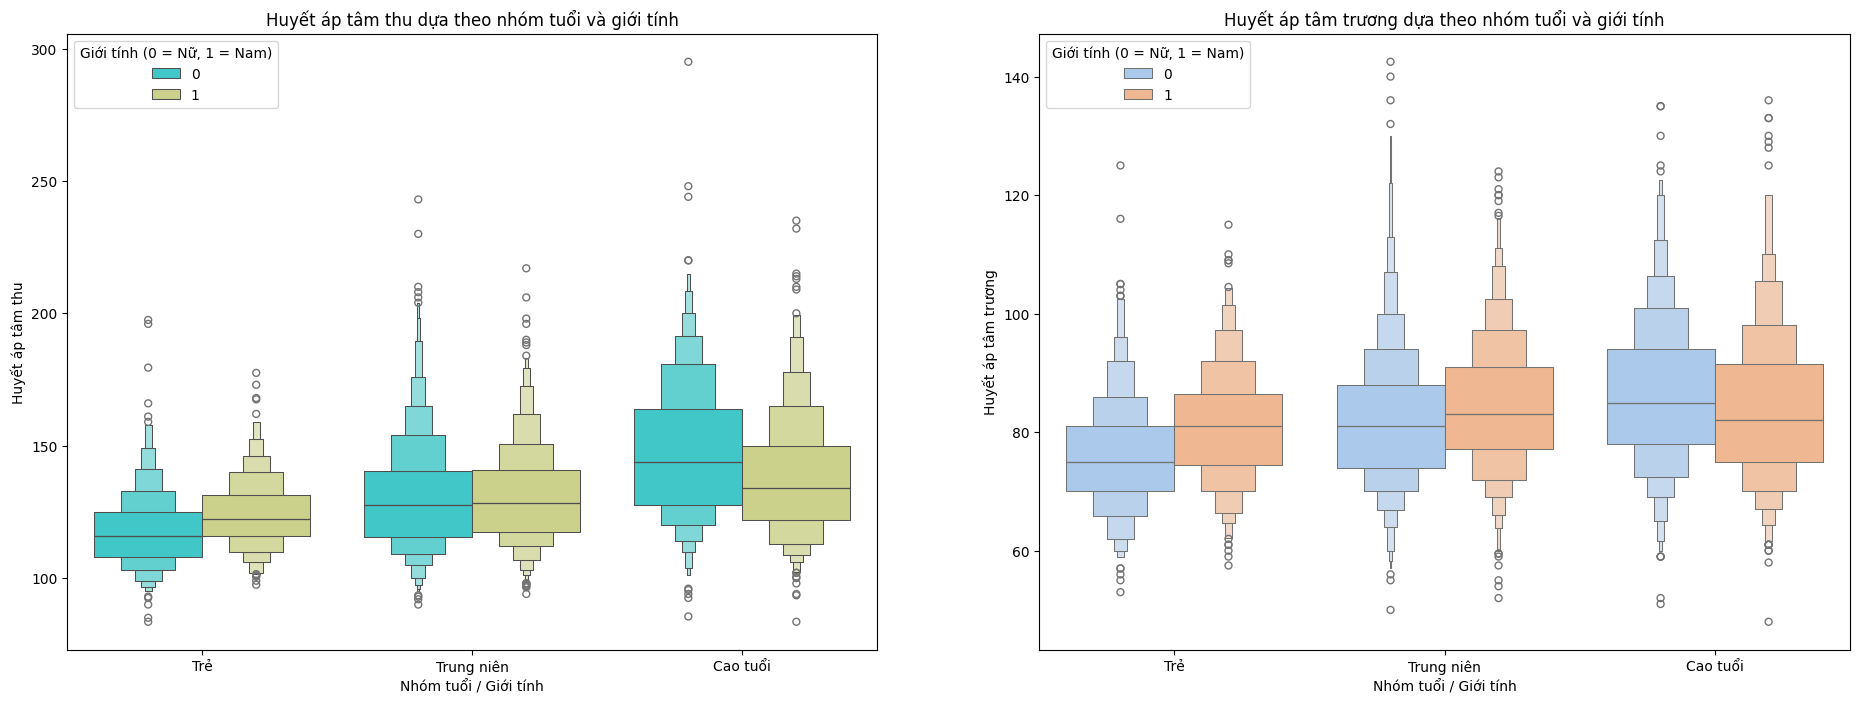

In [52]:
plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='sysBP', hue='male', data=df, palette='rainbow')
plt.xlabel('Nhóm tuổi / Giới tính')
plt.ylabel('Huyết áp tâm thu')
plt.xticks(ticks=[0,1,2], labels=['Trẻ', 'Trung niên', 'Cao tuổi'])
plt.title('Huyết áp tâm thu dựa theo nhóm tuổi và giới tính')
plt.legend(title='Giới tính (0 = Nữ, 1 = Nam)')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='diaBP', hue='male', data=df, palette='pastel')
plt.xlabel('Nhóm tuổi / Giới tính')
plt.ylabel('Huyết áp tâm trương')
plt.xticks(ticks=[0,1,2], labels=['Trẻ', 'Trung niên', 'Cao tuổi'])
plt.title('Huyết áp tâm trương dựa theo nhóm tuổi và giới tính')
plt.legend(title='Giới tính (0 = Nữ, 1 = Nam)')

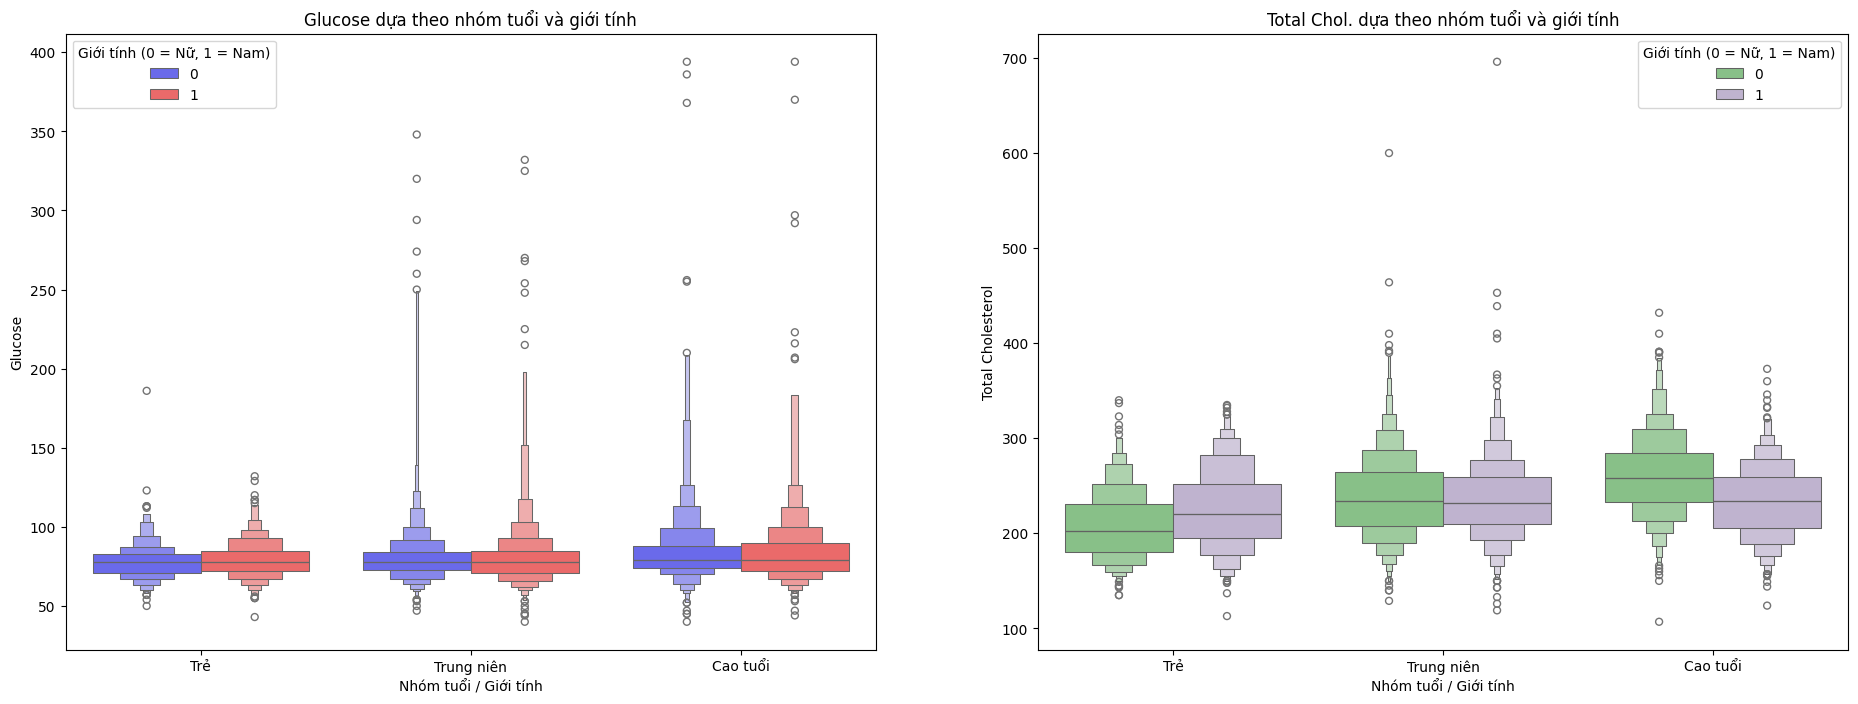

In [53]:
plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='glucose', hue='male', data=df, palette='seismic')
plt.xlabel('Nhóm tuổi / Giới tính')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Trẻ', 'Trung niên', 'Cao tuổi'])
plt.title('Glucose dựa theo nhóm tuổi và giới tính')
plt.legend(title='Giới tính (0 = Nữ, 1 = Nam)')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='totChol', hue='male', data=df, palette='Accent')
plt.xlabel('Nhóm tuổi / Giới tính')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Trẻ', 'Trung niên', 'Cao tuổi'])
plt.title('Total Chol. dựa theo nhóm tuổi và giới tính')
plt.legend(title='Giới tính (0 = Nữ, 1 = Nam)')

Text(0.5, 1.0, 'Số điếu thuốc mỗi ngày theo nhóm tuỏi')

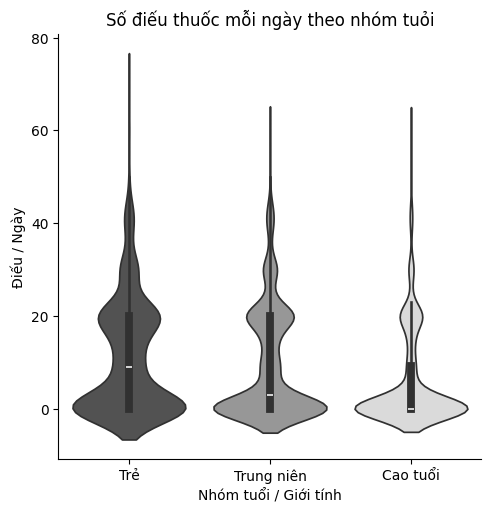

In [54]:
sns.catplot(data=df, x='encode_age', y='cigsPerDay', kind='violin', palette='Greys_r')
plt.xlabel('Nhóm tuổi / Giới tính')
plt.ylabel('Điếu / Ngày')
plt.xticks(ticks=[0,1,2], labels=['Trẻ', 'Trung niên', 'Cao tuổi'])
plt.title('Số điếu thuốc mỗi ngày theo nhóm tuỏi')

Text(0.5, 1.0, 'Bệnh tiểu đường dựa theo nhóm tuổi')

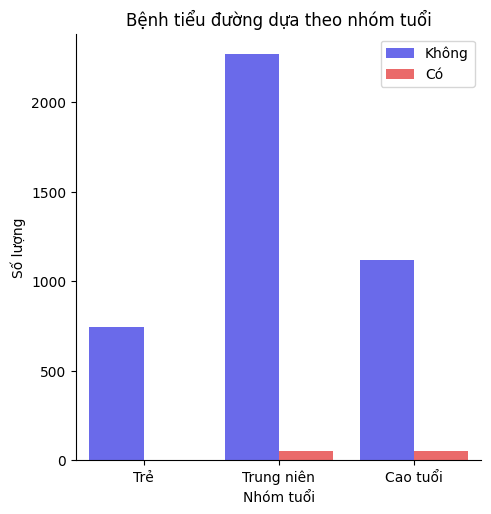

In [55]:
sns.catplot(x='encode_age', hue='diabetes', data=df, kind='count', palette='seismic', legend=False)
plt.xlabel('Nhóm tuổi')
plt.xticks(ticks=[0,1,2], labels=['Trẻ', 'Trung niên', 'Cao tuổi'])
plt.ylabel('Số lượng')
plt.legend(['Không', 'Có'])
plt.title('Bệnh tiểu đường dựa theo nhóm tuổi')

Text(0.5, 1.0, 'Bệnh nhân mắc bệnh tim trong bộ dữ liệu')

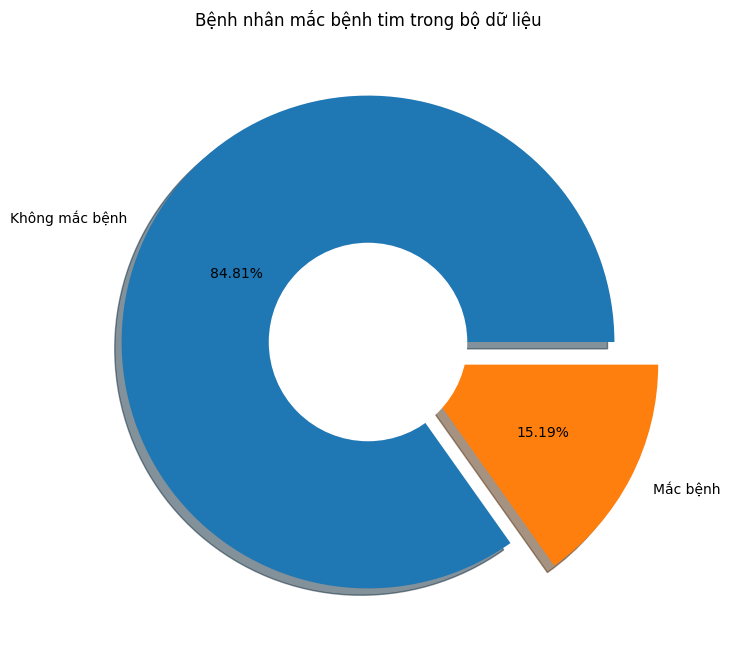

In [56]:
plt.figure(figsize=(8,8))
plt.pie(df['YESorNO'].value_counts(), labels=['Không mắc bệnh','Mắc bệnh'], autopct='%1.2f%%', explode=[0,0.2], shadow=True)
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Bệnh nhân mắc bệnh tim trong bộ dữ liệu')

In [60]:
df_copy = df.copy()

#Log-transform các biến liên tục
df_copy['log_cigsPerDay'] = np.log1p(df_copy['cigsPerDay'])
df_copy['log_totChol'] = np.log1p(df_copy['totChol'])
df_copy['log_diaBP'] = np.log1p(df_copy['diaBP'])
df_copy['log_BMI'] = np.log1p(df_copy['BMI'])
df_copy['log_heartRate'] = np.log1p(df_copy['heartRate'])
df_copy['log_glucose'] = np.log1p(df_copy['glucose'])
df_copy['log_age'] = np.log1p(df_copy['age'])

#Loại bỏ các cột gốc và các biến không cần thiết
df_copy.drop(['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'age',
              'currentSmoker', 'education', 'encode_hr', 'encode_age'], axis=1, inplace=True)

#Chuẩn hóa các biến (đưa về giá trị trung bình = 0, độ lệch chuẩn = 1)
features = df_copy.drop(columns=['YESorNO']).values
labels = df_copy['YESorNO'].values

#features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)
scaler = StandardScaler()
features = scaler.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=23)

np.random.seed(0)
weights = np.random.randn(x_train.shape[1])
bias = 0
learning_rate = 0.01
epochs = 1000

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

def compute_gradient(x, y_true, y_pred):
    dw = np.dot(x.T, (y_pred - y_true)) / x.shape[0]
    db = np.mean(y_pred - y_true)
    return dw, db

def update_parameters(weights, bias, dw, db, learning_rate):
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

for epoch in range(epochs):
    #Dự đoán
    linear_model = np.dot(x_train, weights) + bias
    y_pred = sigmoid(linear_model)

    #Tính toán hàm loss
    loss = compute_loss(y_train, y_pred)

    #Tính gradient
    dw, db = compute_gradient(x_train, y_train, y_pred)

    #Cập nhật trọng số và bias
    weights, bias = update_parameters(weights, bias, dw, db, learning_rate)

test_linear_model = np.dot(x_test, weights) + bias
y_test_pred = sigmoid(test_linear_model) >= 0.5

accuracy = np.mean(y_test == y_test_pred)
print(f'Accuracy on test set: {accuracy:.2f}')

Accuracy on test set: 0.81


Accuracy on test set: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       729
           1       0.30      0.24      0.27       119

    accuracy                           0.81       848
   macro avg       0.59      0.58      0.58       848
weighted avg       0.80      0.81      0.81       848



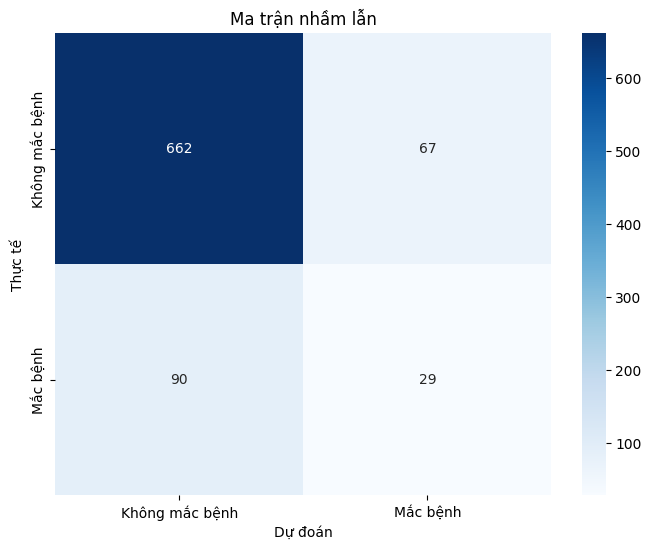

In [64]:
print(f'Accuracy on test set: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_test_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Không mắc bệnh', 'Mắc bệnh'],
            yticklabels=['Không mắc bệnh', 'Mắc bệnh'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn')
plt.show()

Accuracy: 0.86
Precision: 0.80
Recall: 0.03
F1 Score: 0.06
Confusion Matrix:
 [[728   1]
 [115   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       729
           1       0.80      0.03      0.06       119

    accuracy                           0.86       848
   macro avg       0.83      0.52      0.50       848
weighted avg       0.85      0.86      0.81       848



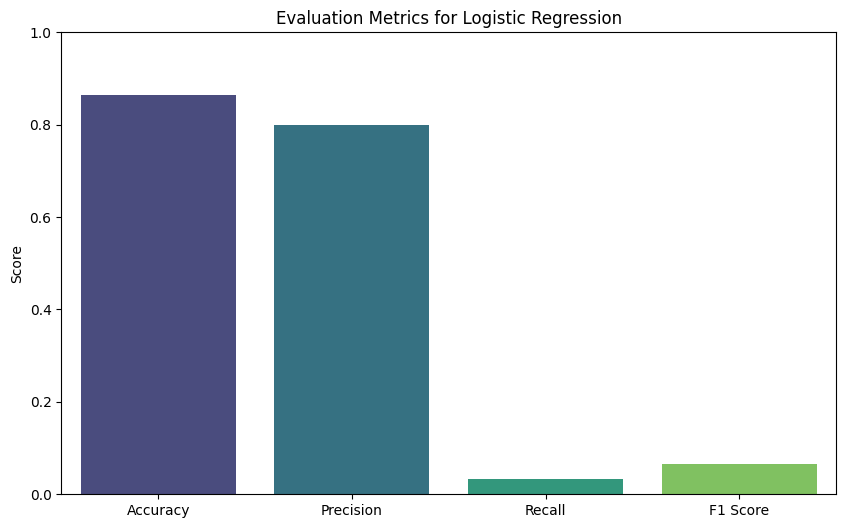

In [59]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=23)
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Evaluation Metrics for Logistic Regression')
plt.show()